## 6. Data Modelling

### A number of models were attempted including:
* Support Vector Classifier (SVC)
* Logistic Regression
* K Nearest Neighbours
* Decision Tree
* Random Forest

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
import re
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
combined_18_19 = pd.read_csv('combined_18_19.csv')

### Step 1: I had initially used the SIC (standard industrial classification) code to classify the industry of each company. However, I noted that since these categories were very specific, it would be more insightful to look at broader groups of categories for example 'Financial and insurance activities' rather than 'Activities of financial services holding companies' and 'Activities of investment trusts'.

### I first had to define the groups which I did using the government website, which alreadt specified the categories (resources.companieshouse.gov.uk/sic/). I then had to create a column with the updated grouping, taking into consideration the fact that some companies had more than one category. The new category column comprised of a list of all categories that applied, separated by /n. 

In [3]:
Agriculture_Forestry_and_Fishing = ['01110', '01120', '01130' '01140', '01150', '01160', '01190', '01210', '01220', 
                                    '01230', '01240', '01250', '01260', '01270', '01280', '01290', '01300', '01410', 
                                    '01420', '01430', '01440', '01450',  '01460', '01470', '01490', '01500', 
                                    '01610', '01621', '01629', '01630', '01640', '01700', '02100', '02200', '02300', 
                                    '02400', '03110', '03120', '03210', '03220']

Mining_and_Quarrying = ['05101', '05102', '05200', '06100', '06200', '07100', '07210', '07290', '08110', '08120',
'08910', '08920', '08930','08990', '09100', '09900']
    
Manufacturing = [
'10110', '10120', '10130', '10200', '10310', '10320', '10390', '10410', '10420', '10511',
'10512', '10519', '10520', '10611', '10612', '10620', '10710', '10720', '10730', '10810', '10821', '10822', '10831',
'10832', '10840', '10850', '10860', '10890', '10910', '10920', '11010', '11020', '11030', '11040', '11050', '11060', 
    '11070', '12000', '13100', '13200', '13300', '13910', '13921', '13922', '13923', '13931', '13939', '13940', 
    '13950', '13960', '13990', '14110', '14120', '14131', '14132', '14141', '14142', '14190', '14200', '14310', 
    '14390', '15110', '15120', '15200', '16100', '16210', '16220', '16230', '16240', '16290', '17110', 
    '17120', '17211', '17219', '17220', '17230', '17240', '17290', '18110', '18121', '18129', '18130', '18140', 
    '18201', '18202', '18203', '19100', '19201', '19209', '20110', '20120', '20130', '20140', '20150', '20160', 
    '20170', '20200', '20301', '20302', '20411', '20412', '20420', '20510', '20520', '20530', '20590', '20600', 
    '21100', '21200', '22110', '22190', '22210', '22220', '22230', '22290', '23110', '23120', '23130', '23140', 
    '23190', '23200', '23310', '23320', '23410', '23420', '23430', '23440', '23490', '23510', '23520', '23610', 
    '23620', '23630', '23640', '23650', '23690', '23700', '23910', '23990', '24100', '24200', '24310', '24320', 
    '24330', '24340', '24410', '24420', '24430', '24440', '24450', '24460', '24510', '24520', '24530', '24540', 
    '25110', '25120', '25210', '25290', '25300', '25400', '25500', '25610', '25620', '25710', '25720', '25730', 
    '25910', '25920', '25930', '25940', '25990', '26110', '26120', '26200', '26301', '26309', '26400', '26511', 
    '26512', '26513', '26514', '26520', '26600', '26701', '26702', '26800', '27110', '27120', '27200', '27310', 
    '27320', '27330', '27400', '27510', '27520', '27900', '28110', '28120', '28131', '28132', '28140', '28150', 
    '28210', '28220', '28230', '28240', '28250', '28290', '28301', '28302', '28410', '28490', '28910', '28921', 
    '28922', '28923', '28930', '28940', '28950', '28960', '28990', '29100', '29201', '29202', '29203', '29310', 
    '29320', '30110', '30120', '30200', '30300', '30400', '30910', '30920', '30990', '31010', '31020', '31030', 
    '31090', '32110', '32120', '32130', '32200', '32300', '32401','32409', '32500', '32910', '32990', '33110', 
    '33120', '33130', '33140', '33150', '33160', '33170', '33190', '33200']

Electricity_gas_steam_and_air_conditioning_supply = ['35110', '35120', '35130', '35140', '35210', '35220', '35230', 
                                                     '35300']
    
Water_supply_sewerage_waste_management_and_remediation_activities = ['36000', '37000', '38110', '38120', '38210', 
                                                                     '38220', 
'38310', '38320', '39000'] 
    
Construction = ['41100','41201','41202','42110','42120','42130','42210','42220','42910','42990','43110','43120',
'43130','43210','43220','43290','43310','43320','43330','43341','43342','43390','43910','43991','43999']
    
Wholesale_and_retail_trade_repair_of_motor_vehicles_and_motorcycles = ['45111','45112','45190','45200','45310',
'45320','45400','46110','46120','46130','46140','46150','46160','46170','46180','46190','46210','46220','46230',
'46240','46310','46320','46330','46341','46342','46350','46360','46370','46380','46390','46410','46420','46431',
'46439','46440','46450','46460','46470','46480','46491','46499','46510','46520','46610','46620','46630','46640',
'46650','46660','46690','46711','46719','46720','46730','46740','46750','46760','46770','46900','47110','47190',
'47210','47220','47230','47240','47250','47260','47290','47300','47410','47421','47429','47430','47510','47520',
'47530','47540','47591','47599','47610','47620','47630','47640','47650','47710','47721','47722','47730','47741',
'47749','47750','47760','47770','47781','47782','47789','47791','47799','47810','47820','47890','47910','47990']
    
Transportation_and_storage = ['49100','49200','49311','49319','49320','49390','49410','49420','49500','50100',
'50200','50300','50400','51101','51102','51210','51220','52101','52102','52103','52211','52212','52213','52219',
                              '52220','52230','52241','52242','52243','52290','53100','53201','53202']
    
Accommodation_and_food_service_activities = ['55100','55201','55202','55209','55300','55900','56101','56102','56103',
'56210','56290','56301','56302']
    
Information_and_communication = ['58110','58120','58130','58141','58142','58190','58210','58290','59111','59112',
'59113','59120','59131','59132','59133','59140','59200','60100','60200','61100','61200','61300','61900','62011',
'62012','62020','62030','62090','63110','63120','63910','63990']

Financial_and_insurance_activities = ['64110','64191','64192','64201','64202','64203','64204',
'64205','64209','64301','64302','64303','64304','64305','64306','64910','64921','64922','64929','64991','64992',
'64999','65110','65120','65201','65202','65300','66110','66120','66190','66210','66220','66290','66300']
    
Real_estate_activities = ['68100','68201','68202','68209','68310','68320']
    
Professional_scientific_and_technical_activities = ['69101','69102','69109','69201','69202',
'69203','70100','70210','70221','70229','71111','71112','71121','71122','71129','71200','72110','72190',
'72200','73110','73120','73200','74100','74201','74202','74203','74209','74300','74901','74902','74909','74990',
                                                    '75000']
    
Administrative_and_support_service_activities = ['77110','77120','77210','77220','77291','77299',
'77310','77320','77330','77341','77342','77351','77352','77390','77400','78101','78109','78200',
'78300','79110','79120','79901','79909','80100','80200','80300','81100','81210','81221','81222',
'81223','81229','81291','81299','81300','82110','82190','82200','82301','82302','82911','82912','82920','82990']
    
Public_administration_and_defence_compulsory_social_security = ['84110','84120','84130','84210',
'84220','84230','84240','84250','84300']
    
Education = ['85100','85200','85310','85320','85410','85421','85422','85510',
             '85520','85530','85590','85600']

Human_health_and_social_work_activities = ['86101','86102','86210','86220',
                                           '86230','86900','87100','87200','87300','87900','88100','88910','88990']
    
Arts_entertainment_and_recreation = ['90010', '90020', '90030', '90040', '91011', '91012', '91020','91030', '91040',
                                     '92000', '93110','93120', '93130','93191', '93199','93210', '93290']
    
Other_service_activities = ['94110', '94120', '94200', '94910', '94920', '94990', 
                            '95110', '95120', '95210', '95220', '95230', '95240', 
                            '95250', '95290', '96010', '96020', '96030', '96040', '96090']

Activities_of_households_as_employers = ['97000', '98000', '98100', '98200']
    
Activities_of_extraterritorial_organisations_and_bodies = ['99000', '99999']

In [4]:
new_sic_code = []
for code in combined_18_19['SicCodes']:
    company_SIC_list = []
    SIC_codes_list = re.split('[^0-9]', code)
    for i in SIC_codes_list:    
        if i in Agriculture_Forestry_and_Fishing:
            company_SIC_list.append('Agriculture_Forestry_and_Fishing')
        elif i in Mining_and_Quarrying:
            company_SIC_list.append('Mining_and_Quarrying')
        elif i in Manufacturing:
            company_SIC_list.append('Manufacturing')           
        elif i in Electricity_gas_steam_and_air_conditioning_supply:
            company_SIC_list.append('Electricity_gas_steam_and_air_conditioning_supply')
        elif i in Water_supply_sewerage_waste_management_and_remediation_activities:
            company_SIC_list.append('Water_supply_sewerage_waste_management_and_remediation_activities')
        elif i in Construction:
            company_SIC_list.append('Construction')        
        elif i in Wholesale_and_retail_trade_repair_of_motor_vehicles_and_motorcycles:
            company_SIC_list.append('Wholesale_and_retail_trade_repair_of_motor_vehicles_and_motorcycles')
        elif i in Transportation_and_storage:
            company_SIC_list.append('Transportation_and_storage')
        elif i in Accommodation_and_food_service_activities:
            company_SIC_list.append('Accommodation_and_food_service_activities')
        elif i in Information_and_communication:
            company_SIC_list.append('Information_and_communication')          
        elif i in Financial_and_insurance_activities:
            company_SIC_list.append('Financial_and_insurance_activities')
        elif i in Real_estate_activities:
            company_SIC_list.append('Real_estate_activities')
        elif i in Professional_scientific_and_technical_activities:
            company_SIC_list.append('Professional_scientific_and_technical_activities')    
        elif i in Administrative_and_support_service_activities:
            company_SIC_list.append('Administrative_and_support_service_activities')
        elif i in Public_administration_and_defence_compulsory_social_security:
            company_SIC_list.append('Public_administration_and_defence_compulsory_social_security')
        elif i in Education:
            company_SIC_list.append('Education')     
        elif i in Human_health_and_social_work_activities:
            company_SIC_list.append('Human_health_and_social_work_activities')
        elif i in Arts_entertainment_and_recreation:
            company_SIC_list.append('Arts_entertainment_and_recreation')
        elif i in Other_service_activities:
            company_SIC_list.append('Other_service_activities')     
        elif i in Activities_of_households_as_employers:
            company_SIC_list.append('Activities_of_households_as_employers')
        elif i in Activities_of_extraterritorial_organisations_and_bodies:
            company_SIC_list.append('Activities_of_extraterritorial_organisations_and_bodies')
    new_sic_code.append(company_SIC_list)

In [5]:
new_sic_code[0:11]

[['Financial_and_insurance_activities'],
 ['Transportation_and_storage', 'Transportation_and_storage'],
 ['Manufacturing'],
 ['Professional_scientific_and_technical_activities',
  'Other_service_activities'],
 ['Financial_and_insurance_activities'],
 ['Manufacturing'],
 ['Information_and_communication', 'Information_and_communication'],
 ['Accommodation_and_food_service_activities',
  'Accommodation_and_food_service_activities'],
 ['Financial_and_insurance_activities'],
 ['Transportation_and_storage'],
 ['Administrative_and_support_service_activities']]

In [6]:
def remove_duplicates_list(x):
    return list(dict.fromkeys(x))
SIC_group = []
for SIC_list in new_sic_code:
    SIC_group.append(remove_duplicates_list(SIC_list))

In [7]:
len(SIC_group)

6373

In [8]:
final_SIC_group = []
for company_SIC in SIC_group:
    new_company_SIC = ''
    if len(company_SIC) == 0:
        None_list = []
        None_list.append("None")
        final_SIC_group.append(None_list)
    if len(company_SIC) == 1:
        final_SIC_group.append(company_SIC)
    if len(company_SIC) > 1:
        list_new_company_SIC = []
        length_list = int(len(company_SIC))
        for i in range(0,length_list):
            company_SIC[i] = company_SIC[i]+", \n"
            new_company_SIC += company_SIC[i]
        new_company_SIC = new_company_SIC[:-3]
        list_new_company_SIC.append(new_company_SIC)
        final_SIC_group.append(list_new_company_SIC)

In [9]:
final_SIC_group[0:11]

[['Financial_and_insurance_activities'],
 ['Transportation_and_storage'],
 ['Manufacturing'],
 ['Professional_scientific_and_technical_activities, \nOther_service_activities'],
 ['Financial_and_insurance_activities'],
 ['Manufacturing'],
 ['Information_and_communication'],
 ['Accommodation_and_food_service_activities'],
 ['Financial_and_insurance_activities'],
 ['Transportation_and_storage'],
 ['Administrative_and_support_service_activities']]

In [10]:
flat_SIC_group = [item for sublist in final_SIC_group for item in sublist]

In [11]:
flat_SIC_group[0:11]

['Financial_and_insurance_activities',
 'Transportation_and_storage',
 'Manufacturing',
 'Professional_scientific_and_technical_activities, \nOther_service_activities',
 'Financial_and_insurance_activities',
 'Manufacturing',
 'Information_and_communication',
 'Accommodation_and_food_service_activities',
 'Financial_and_insurance_activities',
 'Transportation_and_storage',
 'Administrative_and_support_service_activities']

In [12]:
combined_18_19['final_SIC_group'] = flat_SIC_group

### Step 2: Some of the 'rating' categories had strings as results rather than floats, which I dealt with by replacing with a score of 2.5 since I did not want to remove these rows of data. 

In [13]:
combined_18_19['count_5_star'] = combined_18_19['count_5_star'].replace(np.nan, 0)
combined_18_19['count_4_star'] = combined_18_19['count_4_star'].replace(np.nan, 0)
combined_18_19['work_life_balance'] = combined_18_19['work_life_balance'].replace(np.nan, 2.5)
combined_18_19['pay_and_benefits'] = combined_18_19['pay_and_benefits'].replace(np.nan, 2.5)
combined_18_19['job_security_and_advancement'] = combined_18_19['job_security_and_advancement'].replace(np.nan, 2.5)
combined_18_19['management'] = combined_18_19['management'].replace(np.nan, 2.5)
combined_18_19['culture'] = combined_18_19['culture'].replace(np.nan, 2.5)

In [14]:
combined_18_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6373 entries, 0 to 6372
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6373 non-null   object 
 1   EmployerName_x                6373 non-null   object 
 2   SicCodes                      6373 non-null   object 
 3   DiffMeanHourlyPercent         6373 non-null   float64
 4   DiffMedianHourlyPercent       6373 non-null   float64
 5   DiffMeanBonusPercent          6373 non-null   float64
 6   DiffMedianBonusPercent        6373 non-null   float64
 7   MaleBonusPercent              6373 non-null   float64
 8   FemaleBonusPercent            6373 non-null   float64
 9   MaleLowerQuartile             6373 non-null   float64
 10  FemaleLowerQuartile           6373 non-null   float64
 11  MaleLowerMiddleQuartile       6373 non-null   float64
 12  FemaleLowerMiddleQuartile     6373 non-null   float64
 13  Mal

### Step 3: I created a categorical target variable 'DiffMeanHourlyGroup' which assigned a label of either above median 'DiffMeanHourly' or below median 'DiffMeanHourly'. This categorises a company as either having a mean hourly wage gender pay gap above or below median. Above median indicates that on average men are paid more, below median indicates either a lower (below median of 14.5%) pay gap or that women are paid more. 

In [15]:
combined_18_19['DiffMeanHourlyGroup'] = pd.cut(combined_18_19.DiffMeanHourlyPercent,
                     bins=[combined_18_19.DiffMeanHourlyPercent.min()-0.1, 
                           combined_18_19.DiffMeanHourlyPercent.median(), 
                           combined_18_19.DiffMeanHourlyPercent.max()+0.01],
                     labels=["below_median", "above_median"])

### Step 4: I defined the target and feature variables below, using the company number as the index for the feature variable dataframe. I reviewed all the data types to ensure they were as expected. 

In [16]:
X = combined_18_19[['Unnamed: 0',
       'EmployerSize', 'final_SIC_group', 'SubmittedAfterTheDeadline', 'company_status',
       'jurisdiction', 'registered_address_country', 'company_type',
       'locality', 'percent_female_officer',
       'no_CompanyLink', 'no_ResponsiblePerson',
       'review_cons', 'count_5_star',
       'count_4_star', 'count_3_star', 'count_2_star', 'count_1_star',
       'number_of_reviews', 'company_rating', 'work_life_balance',
       'pay_and_benefits', 'job_security_and_advancement', 'management',
       'culture']]

y = combined_18_19.DiffMeanHourlyGroup

In [17]:
combined_18_19.DiffMeanHourlyGroup.value_counts(normalize=True)

below_median    0.502275
above_median    0.497725
Name: DiffMeanHourlyGroup, dtype: float64

In [18]:
X.set_index(keys='Unnamed: 0', inplace=True)
X.head()

,EmployerSize,final_SIC_group,SubmittedAfterTheDeadline,company_status,jurisdiction,registered_address_country,company_type,locality,percent_female_officer,no_CompanyLink,...,count_3_star,count_2_star,count_1_star,number_of_reviews,company_rating,work_life_balance,pay_and_benefits,job_security_and_advancement,management,culture
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
00002065,"20,000 or more",Financial_and_insurance_activities,0,active,england-wales,None,plc,London,0.258065,0,...,210.0,55.0,51.0,899.0,3.8,3.7,3.7,3.4,3.4,3.6
00002404,500 to 999,Transportation_and_storage,0,active,england-wales,None,ltd,Hampshire,0.257143,0,...,0.0,0.0,0.0,7.0,4.6,4.6,4.6,4.3,4.4,4.7
00008614,500 to 999,Manufacturing,0,active,england-wales,England,ltd,Coventry,0.000000,1,...,10.0,5.0,3.0,41.0,3.4,3.4,3.5,2.9,3.0,3.1
00008848,500 to 999,Professional_scientific_and_technical_activiti...,0,active,england-wales,None,private-limited-guarant-nsc,London,0.225806,1,...,9.0,0.0,3.0,34.0,3.9,3.6,3.2,3.2,3.5,3.9
00014259,"20,000 or more",Financial_and_insurance_activities,0,active,england-wales,None,plc,None,0.129032,0,...,2600.0,607.0,457.0,13800.0,4.0,3.8,3.8,3.6,3.6,3.8


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 00002065 to ZC000164
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EmployerSize                  6373 non-null   object 
 1   final_SIC_group               6373 non-null   object 
 2   SubmittedAfterTheDeadline     6373 non-null   int64  
 3   company_status                6373 non-null   object 
 4   jurisdiction                  6373 non-null   object 
 5   registered_address_country    6373 non-null   object 
 6   company_type                  6373 non-null   object 
 7   locality                      6373 non-null   object 
 8   percent_female_officer        6373 non-null   float64
 9   no_CompanyLink                6373 non-null   int64  
 10  no_ResponsiblePerson          6373 non-null   int64  
 11  review_cons                   6373 non-null   object 
 12  count_5_star                  6373 non-null   float64
 1

### Step 5: I applied a column transformer so I could apply different functions to the columns - for the SIC codes, since some companies had multiple codes assigned I decided to use a CountVectorizer so I could record a count of each of the categories for each company. I tested out various models using all the review text data (review header, main text, pros and cons) however the only data that improved the score was the review cons. I applied a TfidfVectorizer to this text data, so that I could minimise the effect of some companies having less reviews than others. 

### For the remaining categorical variables, I appled OneHotEncoder to dummify the variables and I applied StandardScaler to the continuous variables since these were either review counts or review ratings and observations generally fit a Gaussian distribution.

In [20]:
cvec_sic = CountVectorizer()
tvec_cons = TfidfVectorizer(stop_words='english', max_df= 0.95, min_df=0.009, ngram_range=(2,2))
one_hot = OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore') 
scaler = StandardScaler(with_mean=False)

In [21]:
col_trans = ColumnTransformer([('EmployerSize', one_hot, ['EmployerSize']),
                               ('final_SIC_group', cvec_sic, 'final_SIC_group'),
                               ('SubmittedAfterTheDeadline', one_hot, ['SubmittedAfterTheDeadline']),
                               ('company_status', one_hot, ['company_status']),
                               ('jurisdiction', one_hot, ['jurisdiction']),
                               ('registered_address_country', one_hot, ['registered_address_country']),
                               ('company_type', one_hot, ['company_type']),
                               ('locality', one_hot, ['locality']),
#                                ('female_final', scaler, ['female_final']),
#                                ('male_final', scaler, ['male_final']),
                               ('percent_female_officer', scaler, ['percent_female_officer']),
                               ('no_CompanyLink', one_hot, ['no_CompanyLink']),
                               ('no_ResponsiblePerson', one_hot, ['no_ResponsiblePerson']),
#                                ('review_header', tvec_header, 'review_header'),
#                                ('review_text', tvec_text, 'review_text'),
#                                ('review_pros', tvec_pros, 'review_pros'),
                               ('review_cons', tvec_cons, 'review_cons'),
                               ('count_5_star', scaler, ['count_5_star']),
                               ('count_4_star', scaler, ['count_4_star']),
                               ('count_3_star', scaler, ['count_3_star']),
                               ('count_2_star', scaler, ['count_2_star']),
                               ('count_1_star', scaler, ['count_1_star']),
                               ('number_of_reviews', scaler, ['number_of_reviews']),
                               ('company_rating', scaler, ['company_rating']),
                               ('work_life_balance', scaler, ['work_life_balance']),
                               ('pay_and_benefits', scaler, ['pay_and_benefits']),
                               ('job_security_and_advancement', scaler, ['job_security_and_advancement']),
                               ('management', scaler, ['management']),
                               ('culture', scaler, ['culture'])], 
                              remainder='passthrough') # treatment for remaining columns
#                              sparse_threshold=0.6) # set threshold for fraction of nonzero entries 
                                                 # to return dense array rather than sparse matrix

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [23]:
# apply column transformer:
col_trans.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('EmployerSize',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['EmployerSize']),
                                ('final_SIC_group', CountVectorizer(),
                                 'final_SIC_group'),
                                ('SubmittedAfterTheDeadline',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['SubmittedAfterTheDeadline']),
                                ('company_status',
                                 OneHotEncoder(handle_u...
                                ('work_life_balance',
                                 StandardScaler(with_mean=False),
                                 ['work_life_balance']),
                                ('pay_and_benefits

In [24]:
# get all the column names, turn into a list in the right order
final_cols = []
for i in range(0,24):
    try:
        final_cols.append([x for x in col_trans.transformers_[i][1].get_feature_names()])
    except:
        final_cols.append(col_trans.transformers_[i][2])

In [25]:
# turn into a flat list
flat_list = [item for sublist in final_cols for item in sublist]
len(flat_list)

1335

In [26]:
# transform train and test data
X_train = pd.DataFrame(col_trans.transform(X_train), columns=flat_list)
X_test = pd.DataFrame(col_trans.transform(X_test), columns=flat_list)

In [27]:
X_train.head()

,x0_1000 to 4999,"x0_20,000 or more",x0_250 to 499,x0_500 to 999,"x0_5000 to 19,999",x0_Less than 250,x0_Not Provided,accommodation_and_food_service_activities,activities_of_extraterritorial_organisations_and_bodies,activities_of_households_as_employers,...,count_3_star,count_2_star,count_1_star,number_of_reviews,company_rating,work_life_balance,pay_and_benefits,job_security_and_advancement,management,culture
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.101190,5.532530,5.893510,6.286591,6.940047,6.381304,6.349762,5.882614,5.747057,6.186831
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083891,0.114602,0.263475,0.094136,5.627065,5.469689,4.762321,5.347831,5.050444,5.479765
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004576,0.003952,0.000000,0.004886,7.315185,7.475242,5.820615,5.169570,6.269516,6.540364
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004576,0.015807,0.003467,0.007166,7.127616,6.745950,5.996997,6.060875,6.095363,6.893898
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.745535,1.956145,1.254971,3.387593,7.502754,6.928273,6.878908,6.239136,6.095363,6.717131


## SVC Model

In [28]:
model_SVC = LinearSVC(loss='hinge', max_iter=5000000, class_weight='balanced')
# fit the model
model_SVC.fit(X_train, y_train)
# evaluate on the training set
print('Training score:', model_SVC.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model_SVC.score(X_test, y_test))

Training score: 0.7610827775598273
Test Score: 0.6376470588235295


In [29]:
scores_model_SVC = cross_val_score(model_SVC, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores_model_SVC)
print("Mean cross-validated training score:", scores_model_SVC.mean())

Cross-validated training scores: [0.63627451 0.65882353 0.65882353 0.63788027 0.62708538]
Mean cross-validated training score: 0.6437774442456079


In [30]:
# import joblib
# joblib.dump(model_SVC, 'model_1_svc.jlib')

##  Logistic Regresstion Model

In [31]:
model_logistic = LogisticRegression(penalty='l2', C=1, 
                           multi_class='multinomial', solver='saga',
                           max_iter=10000)

# fit the model
model_logistic.fit(X_train, y_train)
# evaluate on the training set
print('Training score:', model_logistic.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model_logistic.score(X_test, y_test))

Training score: 0.7522557865829738
Test Score: 0.6384313725490196


In [32]:
scores_model_logistic = cross_val_score(model_logistic, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores_model_logistic)
print("Mean cross-validated training score:", scores_model_logistic.mean())

Cross-validated training scores: [0.63529412 0.6627451  0.65686275 0.63591757 0.6329735 ]
Mean cross-validated training score: 0.6447586060920933


In [33]:
# joblib.dump(model_logistic, 'model_2_logreg.jlib')

##  Logistic RegresstionCV Model

In [34]:
model_logistic_cv = LogisticRegressionCV(penalty='l2', multi_class='multinomial', max_iter=15000000, cv=5,
                                        n_jobs=-2, verbose=1)

# fit the model
model_logistic_cv.fit(X_train, y_train)
# evaluate on the training set
print('Training score:', model_logistic_cv.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model_logistic_cv.score(X_test, y_test))

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  4.2min finished


Training score: 0.6902706943899568
Test Score: 0.6486274509803922


In [35]:
# joblib.dump(model_logistic_cv, 'model_3_logregCV.jlib')

## Logistic GridSearch Model

In [36]:
model_logreg2 = LogisticRegression(multi_class='multinomial', max_iter=100000)

In [37]:
gs_params = {'penalty': ['elasticnet'],
            'solver': ['saga'],
            'C': np.logspace(-4, 4, 5),
            'l1_ratio': [0, 0.5, 1]
            }

In [38]:
model_logreg_gs = GridSearchCV(model_logreg2, gs_params, cv=5, n_jobs=-2, verbose=3)

model_logreg_gs.fit(X_train, y_train)
dtr_best = model_logreg_gs.best_estimator_
print(model_logreg_gs.best_params_)
print(model_logreg_gs.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-2)]: Done  75 out of  75 | elapsed: 134.9min finished


{'C': 1.0, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
0.6616273162847082


In [39]:
y_pred_linear = model_logreg_gs.predict(X_test)

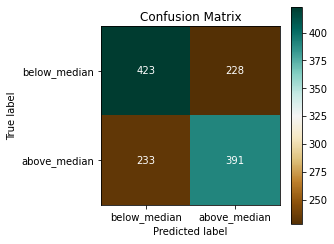

In [40]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_linear, labels=["below_median", "above_median"], figsize=(4,4), cmap='BrBG')
plt.show()

In [41]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

above_median       0.63      0.63      0.63       624
below_median       0.64      0.65      0.65       651

    accuracy                           0.64      1275
   macro avg       0.64      0.64      0.64      1275
weighted avg       0.64      0.64      0.64      1275



In [42]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model_logreg_gs.best_estimator_.coef_.T, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values('coefficients', ascending=False).head(50)

,coefficients,coef_abs
working conditions,1.081814,1.081814
support management,0.964987,0.964987
hours job,0.877937,0.877937
accommodation_and_food_service_activities,0.673878,0.673878
x0_Sheffield,0.648202,0.648202
x0_Not Provided,0.647681,0.647681
x0_Hounslow,0.620751,0.620751
hours working,0.619790,0.619790
hours low,0.573087,0.573087
water_supply_sewerage_waste_management_and_remediation_activities,0.572709,0.572709


In [43]:
probabilities_train = model_logreg_gs.predict_proba(X_train)
probabilities_test = model_logreg_gs.predict_proba(X_test)

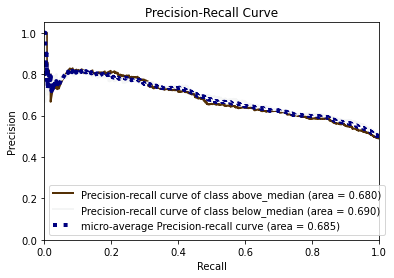

In [44]:
skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap='BrBG')
plt.show()

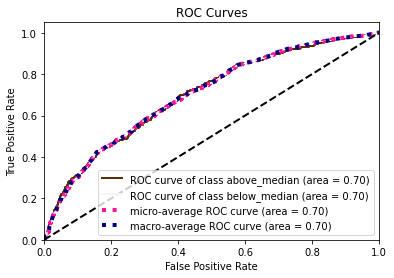

In [45]:
skplt.metrics.plot_roc(y_test, probabilities_test, cmap='BrBG')
plt.show()

In [46]:
df_coef.loc['x0_London']

coefficients   -0.200774
coef_abs        0.200774
Name: x0_London, dtype: float64

In [47]:
model_logreg_gs.classes_

array(['above_median', 'below_median'], dtype=object)

In [48]:
# joblib.dump(model_logreg_gs, 'model_4_logregGS.jlib')

##  KNN Model

In [49]:
model_knn = KNeighborsClassifier()

# fit the model
model_knn.fit(X_train, y_train)
# evaluate on the training set
print('Training score:', model_knn.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model_knn.score(X_test, y_test))

Training score: 0.7487249901922323
Test Score: 0.5976470588235294


In [50]:
scores_model_knn = cross_val_score(model_knn, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores_model_knn)
print("Mean cross-validated training score:", scores_model_knn.mean())

Cross-validated training scores: [0.62254902 0.59705882 0.61372549 0.60647694 0.60157017]
Mean cross-validated training score: 0.6082760876676481


In [51]:
# joblib.dump(model_knn, 'model_5_KNN.jlib')

##  Decision Trees Model

In [52]:
# gridsearch params
dtr_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01]
}

# set the gridsearch
model_decision_tree = DecisionTreeClassifier()
dtr_gs = GridSearchCV(model_decision_tree, dtr_params, cv=5, verbose=1, n_jobs=-2)

In [53]:
# use the gridearch model to fit the data
dtr_gs.fit(X_train, y_train)
dtr_best = dtr_gs.best_estimator_
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)

Fitting 5 folds for each of 1936 candidates, totalling 9680 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 1786 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 2436 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-2)]: Done 3186 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 4036 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-2)]: Done 4986 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-2)]: Done 6036 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-2)]: Done 7186 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-2)]: Done 8436 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-2)]: Done 9680 out of 9680 | elapsed: 10.6min finished


{'ccp_alpha': 0.001, 'max_depth': 9, 'max_features': None, 'min_samples_split': 2}
0.6347526409975177


In [54]:
dtr_best

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9)

In [55]:
# joblib.dump(dtr_gs, 'model_6_dtr.jlib')

## Random Forest Model

In [56]:
params_rf = {'bootstrap': [True],
 'max_depth': [10, 20, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'random_state': [1]}

In [57]:
# Use the grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation
rf_gs = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, verbose=3, n_jobs = -2)
# Fit the random search model
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [1]},
             verbose=3)

In [58]:
rf_best = rf_gs.best_estimator_

print("Best Parameters:", rf_gs.best_params_)
print("Best Score:", rf_gs.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 1}
Best Score: 0.6537824472281553


In [59]:
# Get the mean CV scores
scores_Random_Forest = cross_val_score(rf_gs, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores_Random_Forest)
print("Mean cross-validated training score:", scores_Random_Forest.mean())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:  1.7min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:  1.8min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:  1.8min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:  1.9min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:  1.8min finished


Cross-validated training scores: [0.63627451 0.65294118 0.63627451 0.64867517 0.64180569]
Mean cross-validated training score: 0.6431942119340375


In [60]:
# joblib.dump(rf_random, 'model_7_rf.jlib')